<a href="https://colab.research.google.com/github/yamuna44/yamuna44/blob/main/Credit_Card_Transaction_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/fraudTest.csv')

In [ ]:
data.shape

(555719, 23)

In [ ]:
data.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [ ]:
data = data.drop(data.columns[0], axis=1)

In [ ]:
data.shape

(555719, 22)

In [ ]:
print(data.isnull().sum())

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [ ]:
data.dtypes

,0
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [ ]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])

In [ ]:
data['dob']=pd.to_datetime(data['dob'])

In [ ]:
data.dtypes

,0
trans_date_trans_time,datetime64[ns]
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object


In [ ]:
data=data.drop(columns=['first','last','street','trans_num'])

In [ ]:
# Extract useful date-time features
data['hour'] = data['trans_date_trans_time'].dt.hour        # Hour of transaction (0–23)
data['day'] = data['trans_date_trans_time'].dt.day          # Day of month
data['month'] = data['trans_date_trans_time'].dt.month      # Month of transaction
data['weekday'] = data['trans_date_trans_time'].dt.weekday  # 0=Monday, 6=Sunday

In [ ]:
# Calculate age of the Customer at transaction time
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

In [ ]:
#Calculate Distance (Customer vs Merchant Location)
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Earth radius in kilometers
    r = 6371
    return c * r

# Apply to dataset
data['distance_km'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])


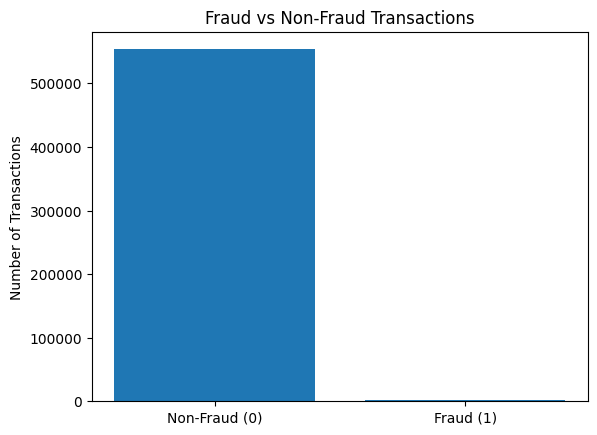

In [ ]:
#Fraud vs Non-Fraud Count (Class Imbalance Check)
import matplotlib.pyplot as plt

# Fraud distribution
fraud_counts = data['is_fraud'].value_counts()

plt.bar(fraud_counts.index, fraud_counts.values)
plt.xticks([0,1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.show()


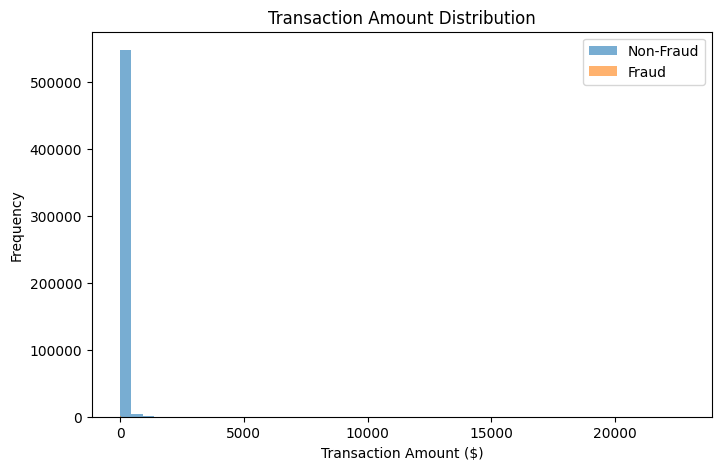

In [ ]:
#Transaction Amount Distribution
plt.figure(figsize=(8,5))
data[data['is_fraud']==0]['amt'].plot(kind='hist', bins=50, alpha=0.6, label='Non-Fraud')
data[data['is_fraud']==1]['amt'].plot(kind='hist', bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount ($)")
plt.show()


Fraud by Hour of Day

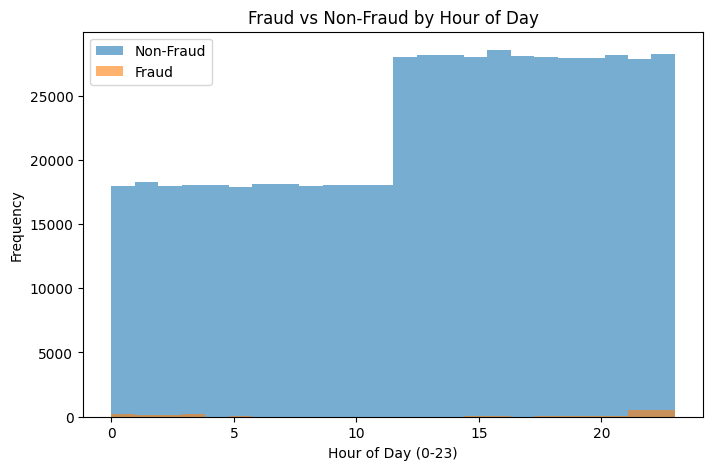

In [ ]:
plt.figure(figsize=(8,5))
data[data['is_fraud']==0]['hour'].plot(kind='hist', bins=24, alpha=0.6, label='Non-Fraud')
data[data['is_fraud']==1]['hour'].plot(kind='hist', bins=24, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Fraud vs Non-Fraud by Hour of Day")
plt.xlabel("Hour of Day (0-23)")
plt.show()


Fraud by Distance (Customer → Merchant)

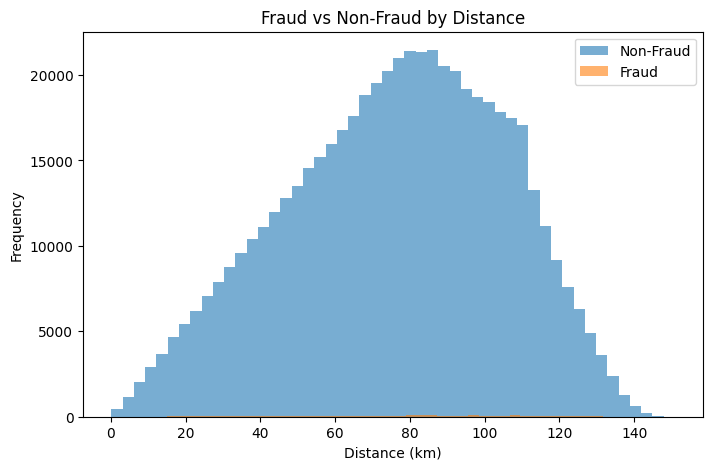

In [ ]:
plt.figure(figsize=(8,5))
data[data['is_fraud']==0]['distance_km'].plot(kind='hist', bins=50, alpha=0.6, label='Non-Fraud')
data[data['is_fraud']==1]['distance_km'].plot(kind='hist', bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Fraud vs Non-Fraud by Distance")
plt.xlabel("Distance (km)")
plt.show()


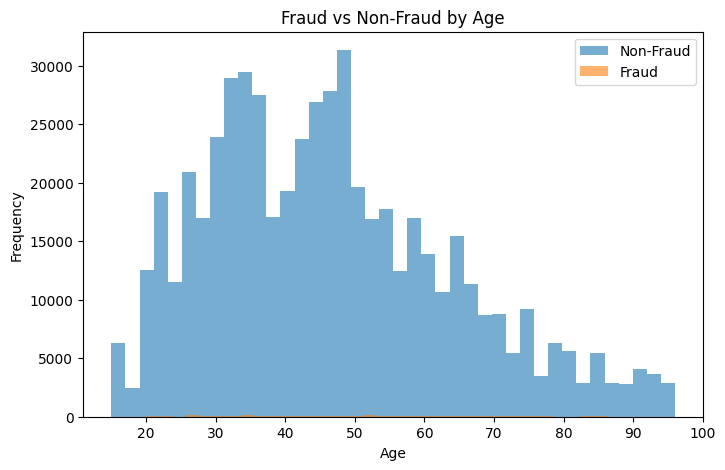

In [ ]:
#Fraud by Age Group
plt.figure(figsize=(8,5))
data[data['is_fraud']==0]['age'].plot(kind='hist', bins=40, alpha=0.6, label='Non-Fraud')
data[data['is_fraud']==1]['age'].plot(kind='hist', bins=40, alpha=0.6, label='Fraud')
plt.legend()
plt.title("Fraud vs Non-Fraud by Age")
plt.xlabel("Age")
plt.show()


Correlation Analysis with Heatmap

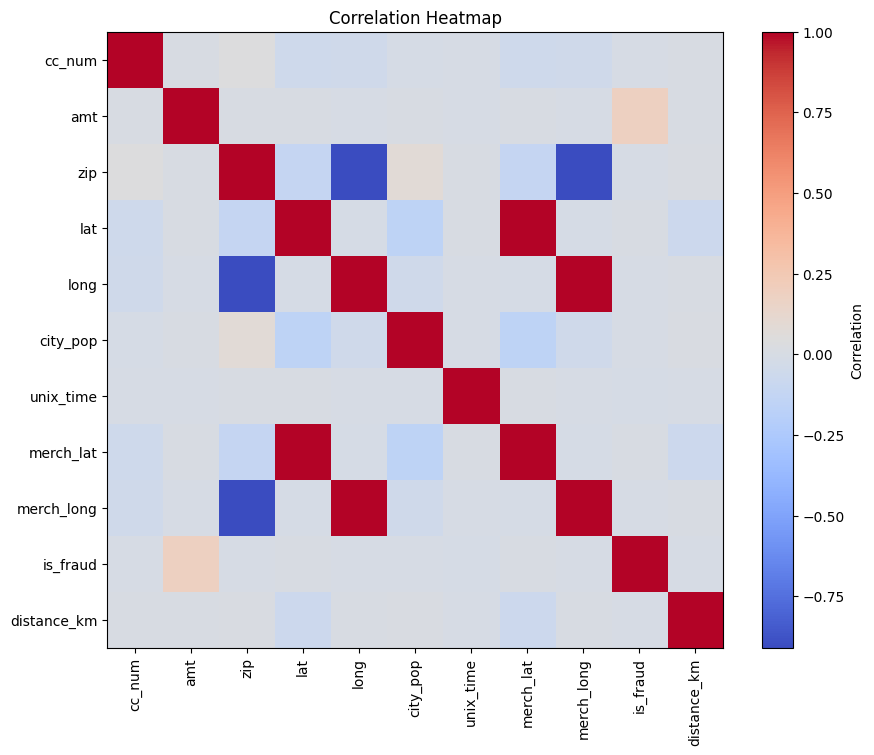

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


Check Correlation with Fraud (is_fraud)

In [ ]:
fraud_corr = corr_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_corr)


is_fraud       1.000000
amt            0.182267
lat            0.005863
merch_lat      0.005812
distance_km    0.000233
long          -0.000972
merch_long    -0.001060
cc_num        -0.001540
zip           -0.002271
city_pop      -0.004910
unix_time     -0.013066
Name: is_fraud, dtype: float64


Feature egineering

In [ ]:
import numpy as np
import pandas as pd

# ----------------- AGE FROM DOB -----------------
# Calculate customer's age at the time of transaction
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

# Adjust if birthday hasn't occurred yet in the transaction year
mask = (
    (data['trans_date_trans_time'].dt.month < data['dob'].dt.month) |
    ((data['trans_date_trans_time'].dt.month == data['dob'].dt.month) &
     (data['trans_date_trans_time'].dt.day < data['dob'].dt.day))
)
data.loc[mask, 'age'] -= 1  # Subtract 1 year if birthday not yet happened

# ----------------- TIME FEATURES -----------------
# Extract features from transaction timestamp
data['hour'] = data['trans_date_trans_time'].dt.hour           # hour of the day (0-23)
data['day'] = data['trans_date_trans_time'].dt.day             # day of month
data['month'] = data['trans_date_trans_time'].dt.month         # month of year
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek  # 0=Mon, 6=Sun
data['is_weekend'] = data['day_of_week'].isin([5,6]).astype(int) # 1 if weekend
data['is_night'] = data['hour'].isin([0,1,2,3,4,5]).astype(int)  # 1 if transaction is at night

# ----------------- HIGH AMOUNT FLAG -----------------
# Flag transactions above 95th percentile as high amount
threshold = data['amt'].quantile(0.95)
data['is_high_amount'] = (data['amt'] > threshold).astype(int)

# ----------------- DISTANCE (Haversine Formula) -----------------
# Function to calculate distance (km) between customer and merchant
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

data['distance_km'] = haversine(data['lat'], data['long'], data['merch_lat'], data['merch_long'])

# ----------------- GENDER ENCODING -----------------
# Convert gender into numeric values: Male=0, Female=1
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

# ----------------- FREQUENCY ENCODING -----------------
# For high-cardinality categorical columns
for col in ['merchant','category','job','state','city']:
    freq = data[col].value_counts()
    data[col + '_freq'] = data[col].map(freq)

# ----------------- NEW MERCHANT FLAG -----------------
# Mark merchants appearing < 10 times as new merchants
data['is_new_merchant'] = (data['merchant_freq'] < 10).astype(int)

# ----------------- DROP RAW / UNNECESSARY COLUMNS -----------------
drop_cols = [
    'first','last','street','trans_num','dob','trans_date_trans_time',
    'merchant','category','job','state','city','lat','long','merch_lat','merch_long'
]

# Use errors='ignore' to avoid KeyError if some columns are already gone
data = data.drop(columns=drop_cols, errors='ignore')

# ----------------- FINAL CHECK -----------------
print("✅ Feature engineering completed. Shape:", data.shape)
print("Final columns:", data.columns)


✅ Feature engineering completed. Shape: (555719, 23)
Final columns: Index(['cc_num', 'amt', 'gender', 'zip', 'city_pop', 'unix_time', 'is_fraud',
       'hour', 'day', 'month', 'weekday', 'age', 'distance_km', 'day_of_week',
       'is_weekend', 'is_night', 'is_high_amount', 'merchant_freq',
       'category_freq', 'job_freq', 'state_freq', 'city_freq',
       'is_new_merchant'],
      dtype='object')


Prepare Dataset for ML

In [ ]:
# Target variable
y = data['is_fraud']

# Features
X = data.drop('is_fraud', axis=1)


Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


cale Numeric Features

Scaling helps some models (like Logistic Regression, KNN) perform better.

Tree-based models (Random Forest, XGBoost) don’t need scaling, but it’s good practice.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training numeric features and transform
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Only scale numeric columns (exclude already encoded binary features if any)
numeric_cols = ['amt', 'distance_km', 'age', 'hour', 'day', 'month', 'day_of_week']
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


Check Shape

In [ ]:
print("X_train shape:", X_train_scaled.shape)
print("X_test shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (444575, 22)
X_test shape: (111144, 22)
y_train shape: (444575,)
y_test shape: (111144,)


Step 8: Train Random Forest & Evaluate

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# ----------------- MODEL TRAINING -----------------
# Initialize Random Forest classifier
# Use class_weight='balanced' to handle fraud class imbalance
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'  # important for imbalanced dataset
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# ----------------- PREDICTIONS -----------------
y_pred = rf_model.predict(X_test_scaled)
y_proba = rf_model.predict_proba(X_test_scaled)[:,1]  # probabilities for ROC-AUC

# ----------------- EVALUATION -----------------
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)


In [ ]:
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (444575, 22)
X_test_scaled shape: (111144, 22)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# 2. Train
rf_model.fit(X_train_scaled, y_train)

# 3. Predict probabilities
y_proba = rf_model.predict_proba(X_test_scaled)[:,1]  # probability of fraud class (1)

# 4. Apply threshold
threshold = 0.3
y_pred_new = (y_proba >= threshold).astype(int)

# 5. Evaluate
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
print(confusion_matrix(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


[[110688     27]
 [   100    329]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.92      0.77      0.84       429

    accuracy                           1.00    111144
   macro avg       0.96      0.88      0.92    111144
weighted avg       1.00      1.00      1.00    111144

ROC-AUC Score: 0.994866657676575


In [ ]:
# Save the processed dataset as Excel
data.to_excel("processed_fraud_data.xlsx", index=False)


In [ ]:
import os
print(os.getcwd())


/content
